# Student name: Yang Zhang

In [4]:
# from importlib import reload
# reload(go)
# if kernel died
# run import chunk
# run define how the AI plays the game
# run interactively Human VS AI

In [3]:
import numpy as np
import go
import nn
import pickle
import matplotlib.pyplot as plt 
from termcolor import colored
%matplotlib inline
import tensorflow as tf
# #tf.enable_eager_execution()
tf.executing_eagerly()


True

## Creat Training Data

### !!! - I dont need to execute this chunk again, as the training data is saved already

In [7]:
# create some training data

game = go.Alak() # always execute this first

n_games = 2000
max_steps = 100

data = []
for i in range(n_games):
    if (i+1) % 100 == 0:
        print('Playing game %d/%d' % (i+1, n_games))
    winner = 0
    while winner == 0:
        game.reset()
        winner = game.play(max_steps=max_steps, players=('greedy', 'greedy'), verbose=False)
    data.append((winner, game.history))

# save the data to pickle
with open('data.pickle', 'wb') as file:
    pickle.dump(data, file)

Playing game 100/2000
Playing game 200/2000
Playing game 300/2000
Playing game 400/2000
Playing game 500/2000
Playing game 600/2000
Playing game 700/2000
Playing game 800/2000
Playing game 900/2000
Playing game 1000/2000
Playing game 1100/2000
Playing game 1200/2000
Playing game 1300/2000
Playing game 1400/2000
Playing game 1500/2000
Playing game 1600/2000
Playing game 1700/2000
Playing game 1800/2000
Playing game 1900/2000
Playing game 2000/2000


## Let's just look at the 1st element of my data

In [8]:
# data[0]

# data = n* (winner, game.history)
# for single row: 
# (x takes the move, (from, to), [board status before x moves])

## Game statistics of training data

Wins history: 
player x: 1134  
player o: 866  
Draws: 0


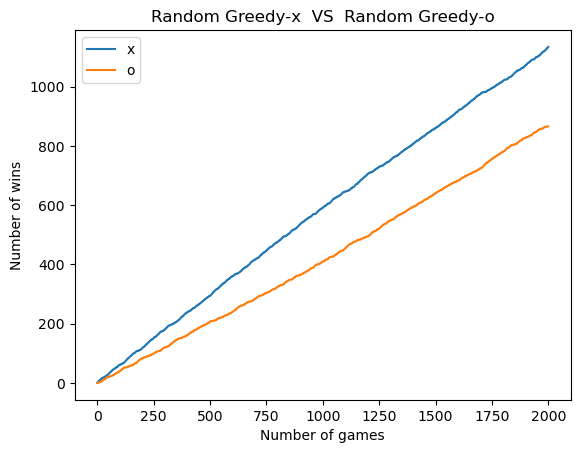

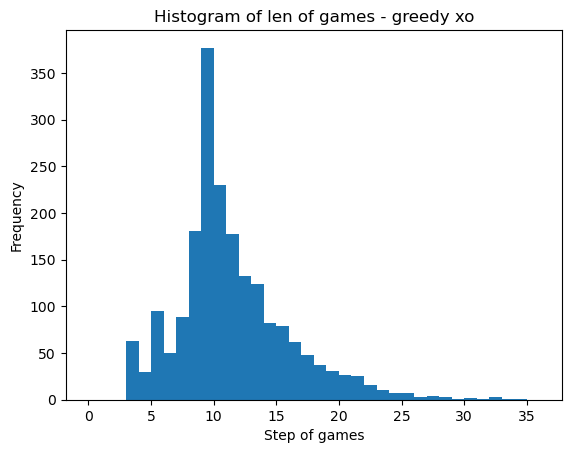

In [9]:
winners = np.array([d[0] for d in data]) # list of winner of each game. i.e. as above example.

print('Wins history: \nplayer x: %r  \nplayer o: %r  \nDraws: %r' % (np.sum(winners == 1), np.sum(winners == -1), np.sum(winners == 0)))

plt.figure(1); plt.clf()
plt.xlabel('Number of games')
plt.ylabel('Number of wins')
plt.plot(np.cumsum(winners == 1), label='x')
plt.plot(np.cumsum(winners == -1), label='o')
plt.title('Random Greedy-x  VS  Random Greedy-o')
plt.legend()
plt.show()

n_moves = np.array([len(d[1]) for d in data])

plt.figure(2); plt.clf()
plt.hist(n_moves, range(0,np.max(n_moves)))
plt.title('Histogram of len of games - greedy xo')
plt.xlabel('Step of games')
plt.ylabel('Frequency')
plt.show()

## CREATING MODEL - MLP(hl = 2...)

In [1]:
# from nn import train_test_data, create_mlp_model, data_xy_mlp, load_data

# data = load_data()

In [8]:
from nn import train_test_data, create_mlp_model, data_xy_mlp, load_data

data = load_data()
data_train, data_test = train_test_data(data, split_percent=0.9)
X_train, Y_train, W_train = data_xy_mlp(data_train)
X_test, Y_test, W_test = data_xy_mlp(data_test)

print(X_train.shape, Y_train.shape, W_train.shape)
print(X_test.shape, Y_test.shape, W_test.shape)

# Create model and train
model = create_mlp_model(input_shape=(X_train.shape[-1],), output_shape=14*13,
                         hidden_layers=2, hidden_units=128)
model.summary()
# model.predict(X_test[:3])

(19769, 15) (19769, 182) (1800,)
(2201, 15) (2201, 182) (200,)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 182)               23478     
                                                                 
Total params: 58,550
Trainable params: 58,550
Non-trainable params: 0
____________________________________________________________

## Training with tensorflow

In [9]:
model.fit(X_train, Y_train, epochs=100, batch_size=20, verbose=2)

# epoch = go thru the dataset
# how many games I need the model to evaluate for updating the weights 
# higher we set verbose, more detailed
# loss below 1 is considered pretty good

Epoch 1/100
989/989 - 4s - loss: 3.8136 - 4s/epoch - 4ms/step
Epoch 2/100
989/989 - 5s - loss: 3.0692 - 5s/epoch - 6ms/step
Epoch 3/100
989/989 - 5s - loss: 2.7899 - 5s/epoch - 5ms/step
Epoch 4/100
989/989 - 5s - loss: 2.6269 - 5s/epoch - 5ms/step
Epoch 5/100
989/989 - 5s - loss: 2.5102 - 5s/epoch - 5ms/step
Epoch 6/100
989/989 - 6s - loss: 2.4156 - 6s/epoch - 6ms/step
Epoch 7/100
989/989 - 5s - loss: 2.3413 - 5s/epoch - 5ms/step
Epoch 8/100
989/989 - 5s - loss: 2.2701 - 5s/epoch - 5ms/step
Epoch 9/100
989/989 - 5s - loss: 2.2149 - 5s/epoch - 5ms/step
Epoch 10/100
989/989 - 5s - loss: 2.1611 - 5s/epoch - 5ms/step
Epoch 11/100
989/989 - 5s - loss: 2.1147 - 5s/epoch - 5ms/step
Epoch 12/100
989/989 - 5s - loss: 2.0669 - 5s/epoch - 5ms/step
Epoch 13/100
989/989 - 5s - loss: 2.0262 - 5s/epoch - 5ms/step
Epoch 14/100
989/989 - 5s - loss: 1.9881 - 5s/epoch - 6ms/step
Epoch 15/100
989/989 - 5s - loss: 1.9454 - 5s/epoch - 5ms/step
Epoch 16/100
989/989 - 5s - loss: 1.9117 - 5s/epoch - 5ms/step
E

## Save the model to a 'tf'folder

In [10]:
model.save('model.tf', save_format='tf')
#model = tf.keras.models.load_model('model.tf)

INFO:tensorflow:Assets written to: model.tf\assets


## Define how AI plays the game   move_ai move_ai  move_ai move_ai move_ai move_ai move_ai 

In [11]:
# play game

# tf.enable_eager_execution()
# tf.executing_eagerly()

from nn import encode_move_to_int, decode_move_from_int

model = tf.keras.models.load_model('model.tf')

def move_ai(player, state, model=model, validate=True, verbose=False):
    if verbose:
        print(colored('AI moving!', 'blue', attrs=['bold']))
    x = np.array([player] + list(state)) # input to AI 15 numbers [player, state0] = [1,0,0,...]
    y = model.predict(x[None,:],verbose = 0)[0] 
    # output of the model - all the moving probabilities  list (0.2, 0.4, .....), np.sum =1 (softmax)it has 182 numbers(14*13)

    if validate:
        valid_moves = go.find_valid_moves(player, state, verbose=verbose)
        if len(valid_moves) == 0:
            return None
        valid_moves = [encode_move_to_int(move) for move in valid_moves]
        mask = np.zeros(len(state) * (len(state) - 1), dtype=bool) # 14*13 (from 14 places, to 13 places - DOF = 13) so there r 14*13 possible numbers
        mask[valid_moves] = True # mask[valid moves index]  = 1 

        move_unvalidated = np.argmax(y) if verbose else 0

        y[np.logical_not(mask)] = 0 # which moves r not possible, they get '0' 

        if verbose:
            if np.argmax(y) != move_unvalidated:
                print('AI unvalidated best move:', decode_move_from_int(np.argmax(move_unvalidated)))
                print('AI validated best move  :', decode_move_from_int(np.argmax(y)))

    move = decode_move_from_int(np.argmax(y)) # choose the max probabibly

    return move


# 
# FINAL PROJECT

## Statistics Analysis
## Show play result in linechart

- set first player: random
- set second player: AI model
- set number of game: 100

In [ ]:
#%% Random VS AI
# (x, o) x always takes the 1st move.

game = go.Alak()
game.reset()

n_games = 100
players=('random', move_ai)
# players=('greedy', move_ai)
# players=('greedy', 'greedy')
# players=( 'interactive', move_ai)
# players=('interactive', move_ai) # I can play with AI

winners2 = np.zeros(n_games, dtype=int)
rounds = np.zeros(n_games, dtype=int)
for g in range(n_games):
    game.reset()
    winner = game.play(players=players, max_steps=100, verbose=False)
    # print('\nPlaying game %d/%d' % (g+1, n_games),  'Winner:', winner)
    winners2[g] = winner
    rounds[g] = len(game.history[-1])

wow_x = np.sum(winners2==1)
wow_o = np.sum(winners2==-1)
wow_drew = np.sum(winners2==0)
    
    
print('\nWinning summary: player x: %r  player o: %r  Draws: %r' % (wow_x,wow_o,wow_drew),
     '\nAI winning percentage','{:.2%}'.format(wow_o/n_games))

In [14]:
np.cumsum(winners2==1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
plt.plot(np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [ ]:
# statistics part

# labels = [player if isinstance(player, str) else 'AI' for player in players]
# if player is a string datatype plot will show string as label, else shows AI.

# # plt.figure(1); plt.clf()
# plt.plot(np.cumsum(winners2 == 1), label='x')
# plt.plot(np.cumsum(winners2 == -1), label='o - AI')

# # plt.title('Number of wins - %s wins %.2f%%' % ('random', 100 * wow_x/len(winners)))
# plt.xlabel('Number of games')
# plt.ylabel('Number of wins')
# plt.legend()
# plt.show()

## AI & Random - single game - show format

In [10]:
game = go.Alak()
game.reset()
game.play(players=(move_ai,'random'), max_steps = 10, verbose=True) 

# as title
# players = (1st player, 2nd player)
# 'x' always takes the first move
# in this case, move_ai is 'o'
# 'random' : random_move, allow suicide
# 'greedy' : random_move_greedy, not allow suicide
# 'interactive' : move_interactive, allow suicide


Round 1

AI moving!
Move x: x x x x x _ _ _ _ o o o o o ==> x x _ x x _ x _ _ o o o o o
        0 1 2 3 4 5 6 7 8 9 a b c d     0 1 2 3 4 5 6 7 8 9 a b c d
Moved piece from 2 to 6
Just captured: 0 
Random moving!
Move o: x x _ x x _ x _ _ o o o o o ==> x x _ x x _ x _ _ o o _ o o
        0 1 2 3 4 5 6 7 8 9 a b c d     0 1 2 3 4 5 6 7 8 9 a b c d
Moved piece from b to 5
Just captured: 0 

Round 2

AI moving!
Move x: x x _ x x _ x _ _ o o _ o o ==> x _ _ x x _ x _ x o o _ o o
        0 1 2 3 4 5 6 7 8 9 a b c d     0 1 2 3 4 5 6 7 8 9 a b c d
Moved piece from 1 to 8
Just captured: 0 
Random moving!
Move o: x _ _ x x _ x _ x o o _ o o ==> x o _ x x _ x _ x o o _ _ o
        0 1 2 3 4 5 6 7 8 9 a b c d     0 1 2 3 4 5 6 7 8 9 a b c d
Moved piece from c to 1
Just captured: 0 

Round 3

AI moving!
Move x: x o _ x x _ x _ x o o _ _ o ==> x o _ x x _ _ _ x _ _ x _ o
        0 1 2 3 4 5 6 7 8 9 a b c d     0 1 2 3 4 5 6 7 8 9 a b c d
Moved piece from 6 to b
Just captured: 2 
Random moving!
Mo

1


## Play Interactively:   Human VS AI              GOGOGOGOGOGOGOGOGOGO

In [12]:
# from importlib import reload
# reload(go)

game = go.Alak()
game.reset()
game.play(players=(move_ai,'interactive'), max_steps = np.inf, verbose=True) 

# as title
# players = (1st player, 2nd player)
# 'x' always takes the first move
# in this case, move_ai is 'x', max = 10 steps or np.inf


Round 1

AI moving!
Move x: x x x x x _ _ _ _ o o o o o ==> _ x x x x _ _ _ x o o o o o
        0 1 2 3 4 5 6 7 8 9 a b c d     0 1 2 3 4 5 6 7 8 9 a b c d
Moved piece from 0 to 8
Just captured: 0 
Contestant moving!
Player: 'o'
_ x x x x _ _ _ x o o o o o
0 1 2 3 4 5 6 7 8 9 a b c d


Choose place to pick piece from: 3
Choose place to put piece to: 6


Invalid move: cannot take piece at 3 !
Not a valid move - Try again!
Player: 'o'
_ x x x x _ _ _ x o o o o o
0 1 2 3 4 5 6 7 8 9 a b c d


Choose place to pick piece from: 8
Choose place to put piece to: 2


Invalid move: cannot take piece at 8 !
Not a valid move - Try again!
Player: 'o'
_ x x x x _ _ _ x o o o o o
0 1 2 3 4 5 6 7 8 9 a b c d


Choose place to pick piece from: q


Quitting the game!
No valid moves ugh omg no valid move!

Played game of 0 rounds
Draw - No winner!


0

## TEST CODE

In [6]:
#%% test game
player_list = ['x', 'x', 'x', 'o', 'o', 'o']
board_list = ['xoxoxx____', 'xooxooxx__', '__xoo__oxo', '_xoxxxoo____', '_x_oxxoo____', '_xoxx___x_']
board_expected = ['x_x_xx____', 'x__x__xx__', '__xoo__o_o', '_xo___oo____', '_x_o__oo____', '_x_xx___x_']

for player, state, expected in zip(player_list, board_list, board_expected):
    print('testing: %s: %s => %s' % (player, state, expected))

    # convert states
    p = go.state_from_str(player)
    s = go.state_from_str(state)
    e = go.state_from_str(expected)

    # update board
    n = go.update(p, s)

    # convert back
    new = go.state_to_str(n)
    print('game:    %s: %s => %s' % (player, state, new))

    if np.any(new != expected):
        print('Test error')
    else:
        print('Test success')

testing: x: xoxoxx____ => x_x_xx____
game:    x: xoxoxx____ => x_x_xx____
Test success
testing: x: xooxooxx__ => x__x__xx__
game:    x: xooxooxx__ => x__x__xx__
Test success
testing: x: __xoo__oxo => __xoo__o_o
game:    x: __xoo__oxo => __xoo__o_o
Test success
testing: o: _xoxxxoo____ => _xo___oo____
game:    o: _xoxxxoo____ => _xo___oo____
Test success
testing: o: _x_oxxoo____ => _x_o__oo____
game:    o: _x_oxxoo____ => _x_o__oo____
Test success
testing: o: _xoxx___x_ => _x_xx___x_
game:    o: _xoxx___x_ => _x_xx___x_
Test success


In [1]:
def f(x):
    return x*2


g = f

In [2]:
g(4)

8